<a href="https://colab.research.google.com/github/Samuel-Ovuehor/Python-Code/blob/main/Mini_Project%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic 23.csv')

In [ ]:
df

,Gender,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,OBED
0,Female,1,21,1.620000,64.000000,1,0,2,3,1,0,2,0,0,1,0,Public_Transportation,Normal weight
1,Female,1,21,1.520000,56.000000,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,Normal weight
2,Male,0,23,1.800000,77.000000,1,0,2,3,1,0,2,0,2,1,2,Public_Transportation,Normal weight
3,Male,0,27,1.800000,87.000000,0,0,3,3,1,0,2,0,2,0,2,Walking,Overweight_Level_I
4,Male,0,22,1.780000,89.800000,0,0,2,1,1,0,2,0,0,0,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,1,21,1.710730,131.408528,1,1,3,3,1,0,2,0,2,1,1,Public_Transportation,Obesity_Type_III
2107,Female,1,22,1.748584,133.742943,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III
2108,Female,1,23,1.752206,133.689352,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III
2109,Female,1,24,1.739450,133.346641,1,1,3,3,1,0,3,0,1,1,1,Public_Transportation,Obesity_Type_III


In [ ]:
x = df[['Height','Weight', 'NCP', 'FAF', 'TUE', 'CH2O', 'SCC', 'FCVC', "CALC"]]

x.corr(method ='pearson')

,Height,Weight,NCP,FAF,TUE,CH2O,SCC,FCVC,CALC
Height,1.000000,0.463136,0.243724,0.296423,0.059041,0.177753,-0.133753,-0.045006,0.129732
Weight,0.463136,1.000000,0.099798,-0.033244,-0.032487,0.195419,-0.201906,0.187764,0.206677
NCP,0.243724,0.099798,1.000000,0.133561,0.017019,0.066300,-0.017725,0.021888,0.071264
FAF,0.296423,-0.033244,0.133561,1.000000,0.047943,0.118220,0.070196,0.027454,-0.080795
TUE,0.059041,-0.032487,0.017019,0.047943,1.000000,-0.017807,-0.021200,-0.070743,-0.023643
CH2O,0.177753,0.195419,0.066300,0.118220,-0.017807,1.000000,-0.001950,0.067882,0.097390
SCC,-0.133753,-0.201906,-0.017725,0.070196,-0.021200,-0.001950,1.000000,0.069702,0.003463
FCVC,-0.045006,0.187764,0.021888,0.027454,-0.070743,0.067882,0.069702,1.000000,0.041043
CALC,0.129732,0.206677,0.071264,-0.080795,-0.023643,0.097390,0.003463,0.041043,1.000000


In [ ]:
# Model 1 – ‘Weight’ as the DV & ‘NCP’ and ‘FAVC’ as the IVs 
 
y = df['Weight'] # DV 
x = df[[ "family_history_with_overweight", "Height", "CALC"]] # NCP & FAVC as IVs 

# Add a constant to an IV 
x = sm.add_constant(x) 
 
# Run the model with y & x2 
mdl1 = sm.OLS(y, x).fit() 
print(mdl1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     470.6
Date:                Fri, 06 May 2022   Prob (F-statistic):          5.27e-234
Time:                        21:02:45   Log-Likelihood:                -9346.9
No. Observations:                2111   AIC:                         1.870e+04
Df Residuals:                    2107   BIC:                         1.872e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 1.0, 'Observed vs. Predicted Values')

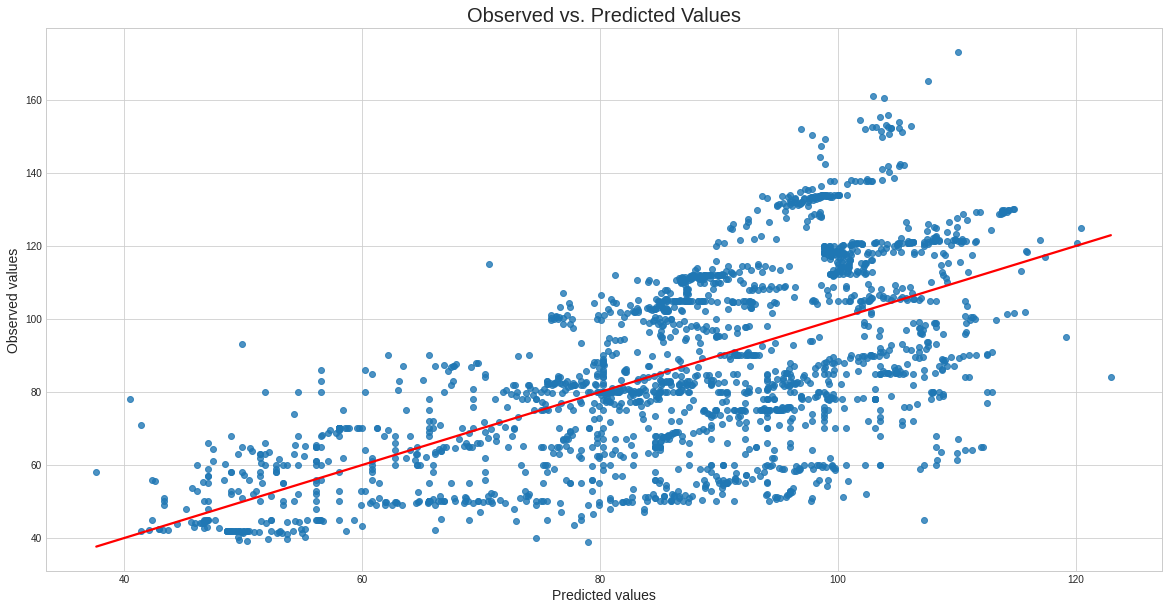

In [ ]:
y_pred = mdl1.predict()

# Set the style and dimension for a scatter plot. 
plt.style.use('seaborn-whitegrid') # Set the style 
plt.rcParams['figure.figsize'] = [20, 10] 
 
# Add the predicted values in the x axis and the observed values in the y axis. 
import seaborn as sns 
sns.regplot(x = y_pred, y = y, ci = None, line_kws = {'color':'red'})  
 
plt.ylabel('Observed values', fontsize = 14) 
plt.xlabel('Predicted values', fontsize = 14) 
plt.title('Observed vs. Predicted Values', fontsize = 20)

Text(0, 0.5, 'Residuals')

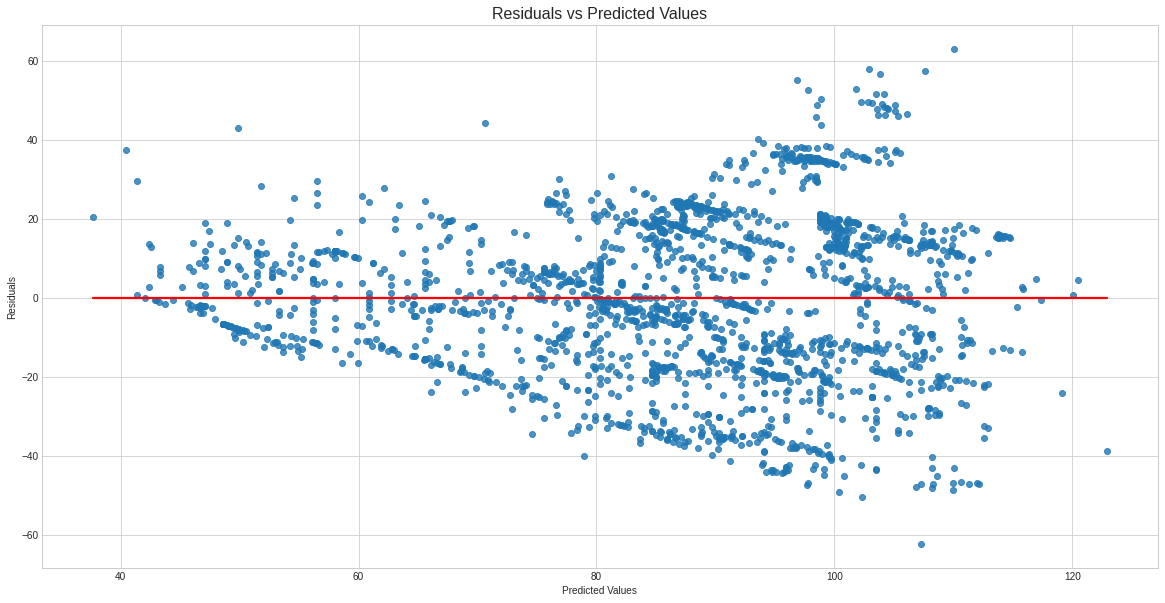

In [ ]:
# Assign residuals/errors to an data object, ‘error’ by using .resid 
error = mdl1.resid 
 
# Set the dimension for a scatter plot. 
plt.figure(figsize=(20,10)) 
 
# Create a scatter plot with predicted value in the x axis and errors in the y axis. 
sns.regplot(x = y_pred, y = error, ci = None, line_kws = 
{'color':'red'}) 
 
plt.title('Residuals vs Predicted Values', fontsize=16) 
plt.xlabel('Predicted Values') 
plt.ylabel('Residuals') 

Text(0.5, 1.0, 'Distribution of Residuals')

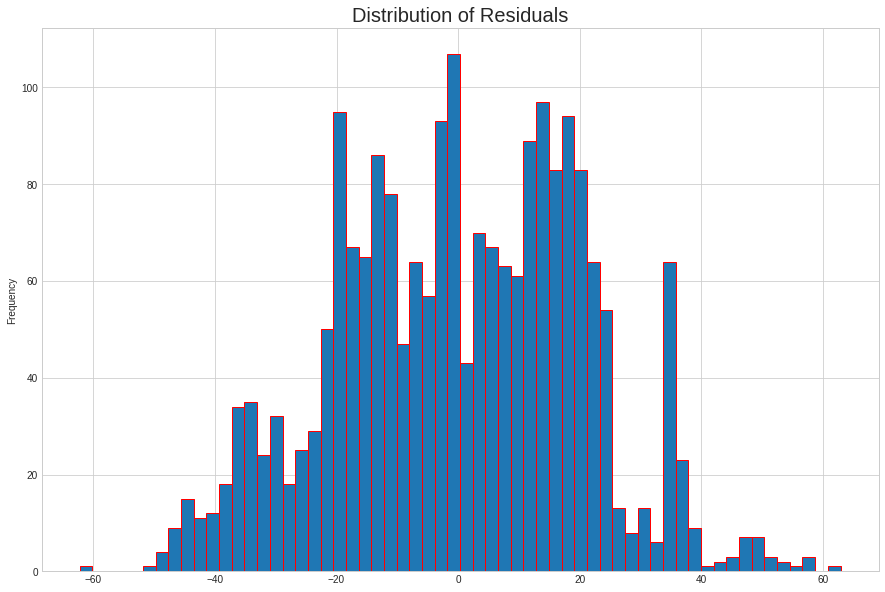

In [ ]:
# Normal distribution of residuals/errors 
# error = mdl1.resid 
 
plt.style.use('seaborn-whitegrid')  
plt.rcParams['figure.figsize'] = [15, 10] 
 
error.plot.hist(grid = True, bins = 60, edgecolor = 'red', linewidth = 
1.0) 
 
plt.title('Distribution of Residuals', fontsize = 20)

In [ ]:
from scipy.stats import shapiro 
 
w, p = shapiro(error) 
 
print("Shapiro-Wilk Normality Test:", "w =", round(w, 3), "p-value =", 
round(p, 3)) 


Shapiro-Wilk Normality Test: w = 0.993 p-value = 0.0


In [ ]:
df['BMI'] = df['Weight']/(df['Height']**2)

In [ ]:
df

,Gender,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,OBED,BMI
0,Female,1,21,1.620000,64.000000,1,0,2,3,1,0,2,0,0,1,0,Public_Transportation,Normal weight,24.386526
1,Female,1,21,1.520000,56.000000,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,Normal weight,24.238227
2,Male,0,23,1.800000,77.000000,1,0,2,3,1,0,2,0,2,1,2,Public_Transportation,Normal weight,23.765432
3,Male,0,27,1.800000,87.000000,0,0,3,3,1,0,2,0,2,0,2,Walking,Overweight_Level_I,26.851852
4,Male,0,22,1.780000,89.800000,0,0,2,1,1,0,2,0,0,0,1,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,1,21,1.710730,131.408528,1,1,3,3,1,0,2,0,2,1,1,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,1,22,1.748584,133.742943,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,1,23,1.752206,133.689352,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,1,24,1.739450,133.346641,1,1,3,3,1,0,3,0,1,1,1,Public_Transportation,Obesity_Type_III,44.071535


In [ ]:
x = df[['family_history_with_overweight', 'CH2O', 'FAVC','FCVC', 'SCC', 'FAF', 'TUE', 'CALC', 'CAEC']] 
 
# .corr is a pd function.  
x.corr(method = 'pearson') 
 

,family_history_with_overweight,CH2O,FAVC,FCVC,SCC,FAF,TUE,CALC,CAEC
family_history_with_overweight,1.000000,0.142742,0.208036,0.031032,-0.185422,-0.043887,0.028862,-0.036676,-0.169787
CH2O,0.142742,1.000000,0.015343,0.067882,-0.001950,0.118220,-0.017807,0.097390,-0.136266
FAVC,0.208036,0.015343,1.000000,-0.028333,-0.190658,-0.095003,0.074841,0.089520,-0.150068
FCVC,0.031032,0.067882,-0.028333,1.000000,0.069702,0.027454,-0.070743,0.041043,0.047546
SCC,-0.185422,-0.001950,-0.190658,0.069702,1.000000,0.070196,-0.021200,0.003463,0.109179
FAF,-0.043887,0.118220,-0.095003,0.027454,0.070196,1.000000,0.047943,-0.080795,0.022618
TUE,0.028862,-0.017807,0.074841,-0.070743,-0.021200,0.047943,1.000000,-0.023643,0.031218
CALC,-0.036676,0.097390,0.089520,0.041043,0.003463,-0.080795,-0.023643,1.000000,-0.047540
CAEC,-0.169787,-0.136266,-0.150068,0.047546,0.109179,0.022618,0.031218,-0.047540,1.000000


In [ ]:
# Model 2 – ‘Weight’ as the DV & ‘NCP’ and ‘FAVC’ as the IVs 
 
y1 = df['BMI'] # DV 
x1 = df[[ "CH2O", "CALC", "FAVC", "FCVC","CAEC", "FAF", "SCC", "TUE", "family_history_with_overweight"]]

# Add a constant to an IV 
x1 = sm.add_constant(x1) 
 
# Run the model with y & x2 
mdl2 = sm.OLS(y1, x1).fit() 
print(mdl2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     160.0
Date:                Fri, 06 May 2022   Prob (F-statistic):          9.85e-231
Time:                        21:02:48   Log-Likelihood:                -6836.6
No. Observations:                2111   AIC:                         1.369e+04
Df Residuals:                    2101   BIC:                         1.375e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 1.0, 'Observed vs. Predicted Values')

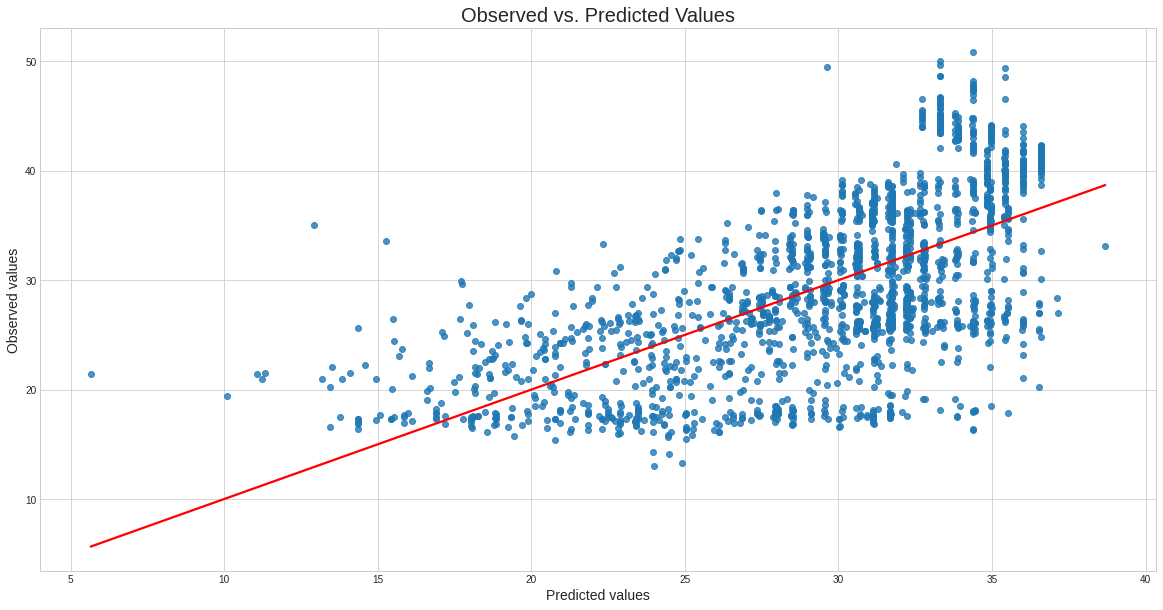

In [ ]:
y_pred = mdl2.predict()

# Set the style and dimension for a scatter plot. 
plt.style.use('seaborn-whitegrid') # Set the style 
plt.rcParams['figure.figsize'] = [20, 10] 
 
# Add the predicted values in the x axis and the observed values in the y axis. 
import seaborn as sns 
sns.regplot(x = y_pred, y = y1, ci = None, line_kws = {'color':'red'})  
 
plt.ylabel('Observed values', fontsize = 14) 
plt.xlabel('Predicted values', fontsize = 14) 
plt.title('Observed vs. Predicted Values', fontsize = 20)

Text(0, 0.5, 'Residuals')

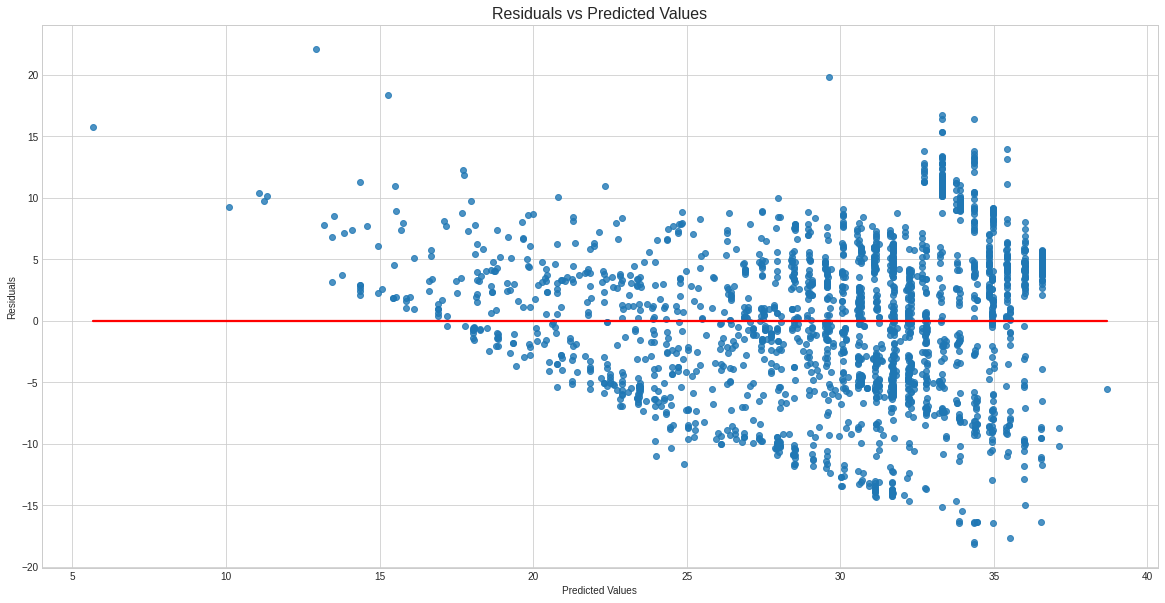

In [ ]:
## Assign residuals/errors to an data object, ‘error’ by using .resid 
error = mdl2.resid 
 
# Set the dimension for a scatter plot. 
plt.figure(figsize=(20,10)) 
 
# Create a scatter plot with predicted value in the x axis and errors in the y axis. 
sns.regplot(x = y_pred, y = error, ci = None, line_kws = {'color':'red'}) 
 
plt.title('Residuals vs Predicted Values', fontsize=16) 
plt.xlabel('Predicted Values') 
plt.ylabel('Residuals') 

Text(0.5, 1.0, 'Distribution of Residuals')

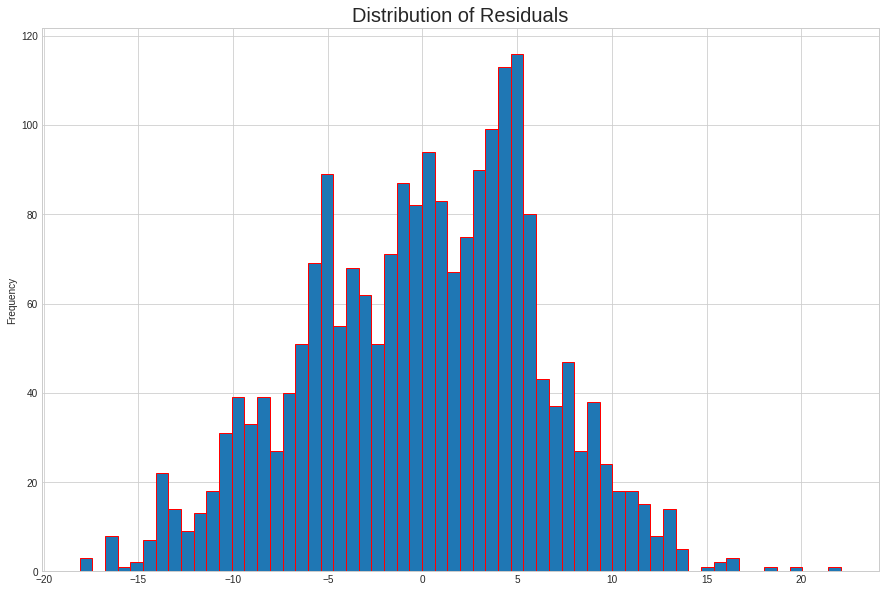

In [ ]:
# Normal distribution of residuals/errors 
# error = mdl2.resid 
 
plt.style.use('seaborn-whitegrid')  
plt.rcParams['figure.figsize'] = [15, 10] 
 
error.plot.hist(grid = True, bins = 60, edgecolor = 'red', linewidth = 
1.0) 
 
plt.title('Distribution of Residuals', fontsize = 20)

In [ ]:
from scipy.stats import shapiro 
 
w, p = shapiro(error) 
 
print("Shapiro-Wilk Normality Test:", "w =", round(w, 3), "p-value =", 
round(p, 3)) 

Shapiro-Wilk Normality Test: w = 0.993 p-value = 0.0


In [ ]:
def weight_grp(BMI):
  if BMI < 18.5:
    return "Underweight"
  elif BMI >18.5 and BMI < 24.9:
    return "Healthyweight"
  elif BMI > 25.0 and BMI < 29.9:
    return "Overweight"
  elif BMI > 30 and BMI < 34.9:
    return "Obese"
  elif BMI > 35.0 and BMI < 39.9:
    return "Obesity Type 1"
  else:
    return "Obesity Type 2"


In [ ]:
df['BMI2'] = df['BMI'].apply(weight_grp)  
df['BMI2']

0        Healthyweight
1        Healthyweight
2        Healthyweight
3           Overweight
4           Overweight
             ...      
2106    Obesity Type 2
2107    Obesity Type 2
2108    Obesity Type 2
2109    Obesity Type 2
2110    Obesity Type 2
Name: BMI2, Length: 2111, dtype: object

In [ ]:
# Import necessary packages 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
 
# Data import – make sure that you use your 
 



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic 231.csv")

In [ ]:
df


,Gender,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,Female,1,21,1.620000,64.000000,1,0,2,3,1,0,2,0,0,1,0,Public_Transportation,0rmal_Weight
1,Female,1,21,1.520000,56.000000,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,0rmal_Weight
2,Male,0,23,1.800000,77.000000,1,0,2,3,1,0,2,0,2,1,2,Public_Transportation,0rmal_Weight
3,Male,0,27,1.800000,87.000000,0,0,3,3,1,0,2,0,2,0,2,Walking,Overweight_Level_I
4,Male,0,22,1.780000,89.800000,0,0,2,1,1,0,2,0,0,0,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,1,21,1.710730,131.408528,1,1,3,3,1,0,2,0,2,1,1,Public_Transportation,Obesity_Type_III
2107,Female,1,22,1.748584,133.742943,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III
2108,Female,1,23,1.752206,133.689352,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III
2109,Female,1,24,1.739450,133.346641,1,1,3,3,1,0,3,0,1,1,1,Public_Transportation,Obesity_Type_III


In [ ]:
df['BMI'] = df['Weight']/(df['Height']**2)
df

,Gender,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad,BMI
0,Female,1,21,1.620000,64.000000,1,0,2,3,1,0,2,0,0,1,0,Public_Transportation,0rmal_Weight,24.386526
1,Female,1,21,1.520000,56.000000,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,0rmal_Weight,24.238227
2,Male,0,23,1.800000,77.000000,1,0,2,3,1,0,2,0,2,1,2,Public_Transportation,0rmal_Weight,23.765432
3,Male,0,27,1.800000,87.000000,0,0,3,3,1,0,2,0,2,0,2,Walking,Overweight_Level_I,26.851852
4,Male,0,22,1.780000,89.800000,0,0,2,1,1,0,2,0,0,0,1,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,1,21,1.710730,131.408528,1,1,3,3,1,0,2,0,2,1,1,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,1,22,1.748584,133.742943,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,1,23,1.752206,133.689352,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,1,24,1.739450,133.346641,1,1,3,3,1,0,3,0,1,1,1,Public_Transportation,Obesity_Type_III,44.071535


In [ ]:
df['BMI2'] = df['BMI'].apply(weight_grp) 

df

,Gender,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad,BMI,BMI2
0,Female,1,21,1.620000,64.000000,1,0,2,3,1,0,2,0,0,1,0,Public_Transportation,0rmal_Weight,24.386526,Healthyweight
1,Female,1,21,1.520000,56.000000,1,0,3,3,1,1,3,1,3,0,1,Public_Transportation,0rmal_Weight,24.238227,Healthyweight
2,Male,0,23,1.800000,77.000000,1,0,2,3,1,0,2,0,2,1,2,Public_Transportation,0rmal_Weight,23.765432,Healthyweight
3,Male,0,27,1.800000,87.000000,0,0,3,3,1,0,2,0,2,0,2,Walking,Overweight_Level_I,26.851852,Overweight
4,Male,0,22,1.780000,89.800000,0,0,2,1,1,0,2,0,0,0,1,Public_Transportation,Overweight_Level_II,28.342381,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,1,21,1.710730,131.408528,1,1,3,3,1,0,2,0,2,1,1,Public_Transportation,Obesity_Type_III,44.901475,Obesity Type 2
2107,Female,1,22,1.748584,133.742943,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III,43.741923,Obesity Type 2
2108,Female,1,23,1.752206,133.689352,1,1,3,3,1,0,2,0,1,1,1,Public_Transportation,Obesity_Type_III,43.543817,Obesity Type 2
2109,Female,1,24,1.739450,133.346641,1,1,3,3,1,0,3,0,1,1,1,Public_Transportation,Obesity_Type_III,44.071535,Obesity Type 2


In [ ]:
def wgt_grp(Gender_2):
  if Gender_2 <1:
    return "Male"
  else:
    return "Female"

In [ ]:
df["BMI2"].value_counts()

Overweight        562
Obese             366
Obesity Type 1    335
Healthyweight     296
Obesity Type 2    281
Underweight       271
Name: BMI2, dtype: int64

In [ ]:
def weight_grp(BMI):
  if BMI < 18.5:
    return "Underweight"
  elif BMI >18.5 and BMI < 24.9:
    return "Healthyweight"
  elif BMI > 25.0 and BMI < 29.9:
    return "Overweight"
  elif BMI > 30 and BMI < 34.9:
    return "Obese"
  elif BMI > 35.0 and BMI < 39.9:
    return "Obesity Type 1"
  else:
    return "Obesity Type 2"


In [ ]:
df.groupby(by='Gender').size()

Gender
Female    1043
Male      1068
dtype: int64

In [ ]:
df.groupby(by='Gender').mean()

,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
Gender,,,,,,,,,,,,,,,,
Female,1.0,24.002876,1.643298,82.302364,0.777565,0.862895,2.590604,2.641419,1.184084,0.014382,1.989453,0.067114,0.859060,0.694151,0.735379,30.130002
Male,0.0,24.621723,1.758690,90.769478,0.856742,0.904494,2.294007,2.758427,1.098315,0.027154,2.084270,0.024345,1.203184,0.687266,0.727528,29.280377


In [ ]:
df.groupby(by='Gender').min()

,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad,BMI,BMI2
Gender,,,,,,,,,,,,,,,,,,,
Female,1,15,1.45,39.0,0,0,1,1,0,0,1,0,0,0,0,Automobile,0rmal_Weight,12.998685,Healthyweight
Male,0,14,1.56,45.0,0,0,1,1,0,0,1,0,0,0,0,Automobile,0rmal_Weight,13.291588,Healthyweight


In [ ]:
df.groupby(by='Gender').max()

,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad,BMI,BMI2
Gender,,,,,,,,,,,,,,,,,,,
Female,1,61,1.843419,165.057269,1,1,3,4,3,1,3,1,3,2,2,Walking,Overweight_Level_II,50.811753,Underweight
Male,0,56,1.980000,173.000000,1,1,3,4,3,1,3,1,3,2,3,Walking,Overweight_Level_II,49.472390,Underweight


In [ ]:
df.describe

<bound method NDFrame.describe of       Gender  Gender_2  Age     Height      Weight  \
0     Female         1    21  1.620000   64.000000   
1     Female         1    21  1.520000   56.000000   
2       Male         0    23  1.800000   77.000000   
3       Male         0    27  1.800000   87.000000   
4       Male         0    22  1.780000   89.800000   
...      ...       ...   ...       ...         ...   
2106  Female         1    21  1.710730  131.408528   
2107  Female         1    22  1.748584  133.742943   
2108  Female         1    23  1.752206  133.689352   
2109  Female         1    24  1.739450  133.346641   
2110  Female         1    24  1.738836  133.472641   

      family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  \
0                                  1     0     2    3     1      0     2    0   
1                                  1     0     3    3     1      1     3    1   
2                                  1     0     2    3     1      0     2  

In [ ]:
df.groupby(by='Gender').describe()

Gender_2                                       Age              ...  \
          count mean  std  min  25%  50%  75%  max   count       mean  ...   
Gender                                                                 ...   
Female   1043.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1043.0  24.002876  ...   
Male     1068.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1068.0  24.621723  ...   

       CALC          BMI                                             \
        75%  max   count       mean       std        min        25%   
Gender                                                                
Female  1.0  2.0  1043.0  30.130002  9.399448  12.998685  22.363653   
Male    1.0  3.0  1068.0  29.280377  6.346875  13.291588  25.572407   

                                         
              50%        75%        max  
Gender                                   
Female  28.465346  40.084283  50.811753  
Male    28.905612  35.219092  49.472390  

[2 rows x 128 columns]

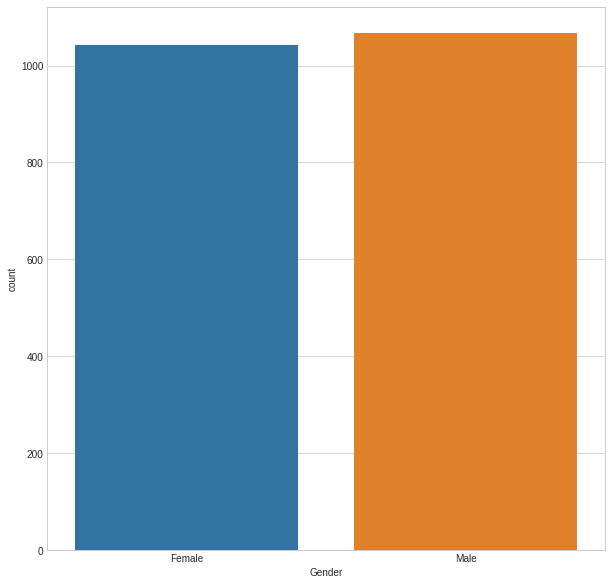

In [ ]:
plt.style.use('seaborn-whitegrid') # Set the style 
plt.rcParams['figure.figsize'] = [10, 10] 
 
sns.countplot(x = 'Gender', data = df) 

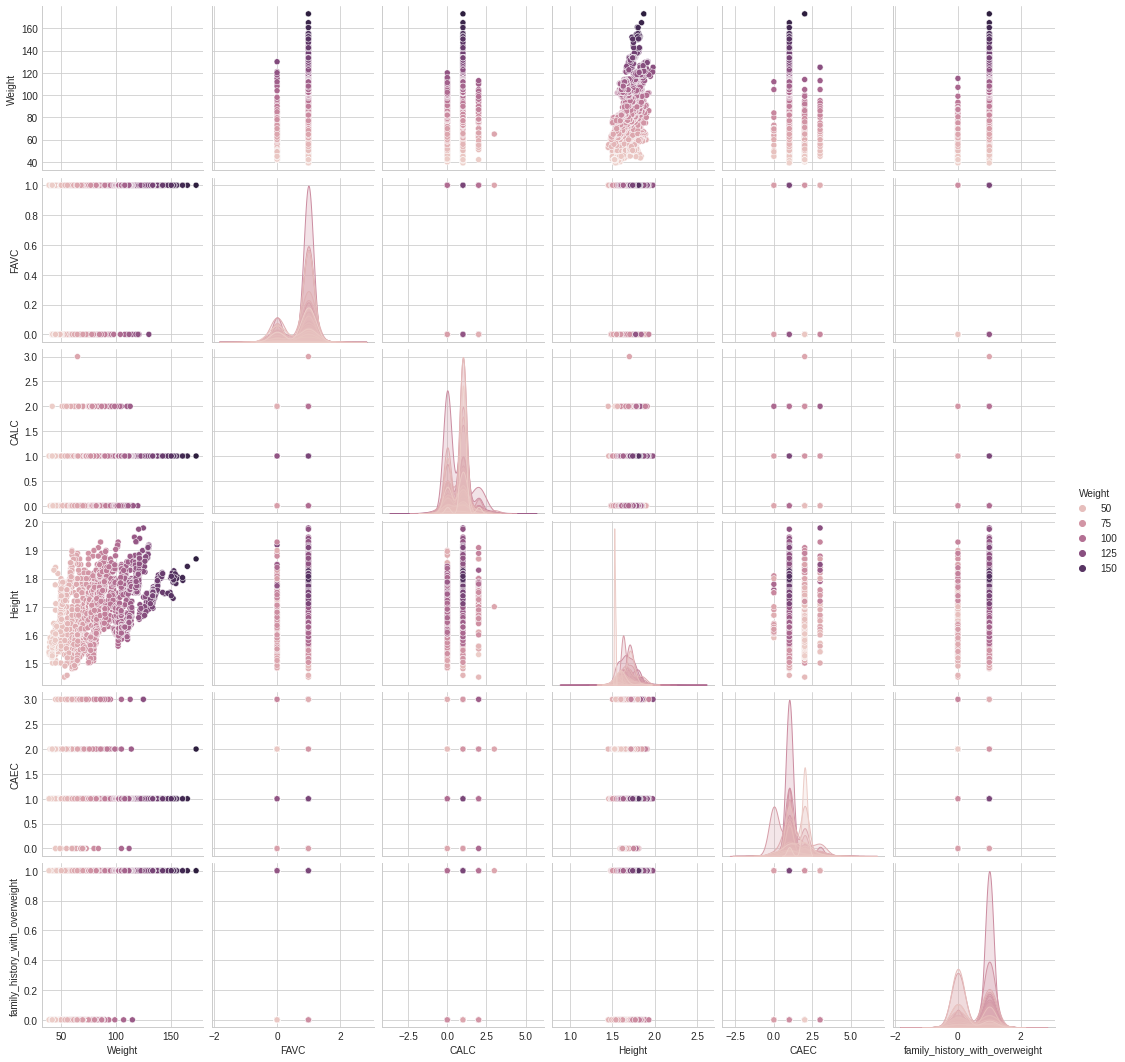

In [ ]:

sns.pairplot(df, vars = ["Weight","FAVC", "CALC", "Height", "CAEC", "family_history_with_overweight"], hue = 'Weight')  




In [ ]:
df.groupby(by=['Gender', 'BMI', 'Weight']).describe()

Gender_2                                    Age   \
                               count mean std  min  25%  50%  75%  max count   
Gender BMI       Weight                                                        
Female 12.998685 43.534531       1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   1.0   
       14.160575 44.762023       1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   1.0   
       14.253876 47.124717       1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   1.0   
       15.432099 50.000000       1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   1.0   
       15.457234 45.248627       1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   1.0   
...                              ...  ...  ..  ...  ...  ...  ...  ...   ...   
Male   39.295915 101.038263      1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0   1.0   
       39.391648 103.393354      1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0   1.0   
       39.733023 103.175516      1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0   1.0   
       39.786652 104.303711      1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0   1.0   
       49.472390 173.000000      1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0   1.0   

                                   ...  TUE       CALC                     \
                             mean  ...  75%  max count mean std  min  25%   
Gender BMI       Weight            ...                                      
Female 12.998685 43.534531   17.0  ...  2.0  2.0   1.0  1.0 NaN  1.0  1.0   
       14.160575 44.762023   17.0  ...  2.0  2.0   1.0  1.0 NaN  1.0  1.0   
       14.253876 47.124717   16.0  ...  1.0  1.0   1.0  1.0 NaN  1.0  1.0   
       15.432099 50.000000   17.0  ...  1.0  1.0   1.0  1.0 NaN  1.0  1.0   
       15.457234 45.248627   17.0  ...  1.0  1.0   1.0  1.0 NaN  1.0  1.0   
...                           ...  ...  ...  ...   ...  ...  ..  ...  ...   
Male   39.295915 101.038263  25.0  ...  2.0  2.0   1.0  0.0 NaN  0.0  0.0   
       39.391648 103.393354  20.0  ...  1.0  1.0   1.0  0.0 NaN  0.0  0.0   
       39.733023 103.175516  20.0  ...  2.0  2.0   1.0  0.0 NaN  0.0  0.0   
       39.786652 104.303711  20.0  ...  1.0  1.0   1.0  0.0 NaN  0.0  0.0   
       49.472390 173.000000  18.0  ...  1.0  1.0   1.0  1.0 NaN  1.0  1.0   

                                            
                             50%  75%  max  
Gender BMI       Weight                     
Female 12.998685 43.534531   1.0  1.0  1.0  
       14.160575 44.762023   1.0  1.0  1.0  
       14.253876 47.124717   1.0  1.0  1.0  
       15.432099 50.000000   1.0  1.0  1.0  
       15.457234 45.248627   1.0  1.0  1.0  
...                          ...  ...  ...  
Male   39.295915 101.038263  0.0  0.0  0.0  
       39.391648 103.393354  0.0  0.0  0.0  
       39.733023 103.175516  0.0  0.0  0.0  
       39.786652 104.303711  0.0  0.0  0.0  
       49.472390 173.000000  1.0  1.0  1.0  

[1993 rows x 112 columns]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def healthy_grp(health):
  if health < 30:
   return "Not Obese"
  else:
    return "Obese"

In [ ]:
df['W'] = df['BMI'].apply(healthy_grp)
# See how many you have in each group
df['W'].value_counts()

Not Obese    1137
Obese         974
Name: W, dtype: int64

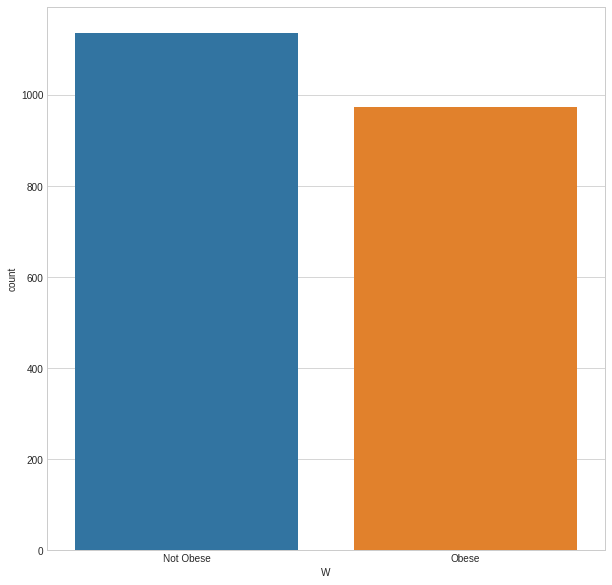

In [ ]:
plt.style.use('seaborn-whitegrid') # Set the style
plt.rcParams['figure.figsize'] = [10, 10]
sns.countplot(x = 'W', data = df)

In [ ]:
df.groupby('W').describe().round(3)
# To get key statistics for each of the W2 groups on selected variables, run:
df[["FAVC", "CALC", "CH2O", "FCVC", "CAEC"]].groupby(df['W']).describe().round(3)


FAVC                                           CALC         ...  \
            count   mean    std  min  25%  50%  75%  max   count   mean  ...   
W                                                                        ...   
Not Obese  1137.0  0.804  0.397  0.0  1.0  1.0  1.0  1.0  1137.0  0.697  ...   
Obese       974.0  0.977  0.149  0.0  1.0  1.0  1.0  1.0   974.0  0.772  ...   

          FCVC         CAEC                                         
           75%  max   count   mean    std  min  25%  50%  75%  max  
W                                                                   
Not Obese  3.0  3.0  1137.0  1.242  0.591  0.0  1.0  1.0  1.0  3.0  
Obese      3.0  3.0   974.0  1.023  0.207  0.0  1.0  1.0  1.0  3.0  

[2 rows x 40 columns]

TypeError: ignored

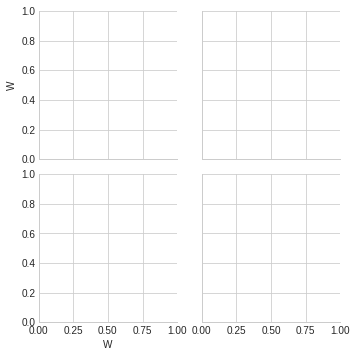

In [ ]:
sns.pairplot(df, vars = ['W', ''], hue = 'W')


In [ ]:
import statsmodels.api as sm
# 1. Linearity of independent variables and log odds
# Creating log transformed IVs &
# Obtain interaction terms between each predictor and the log of itself.
df['FAVC_int'] = np.log(df['FAVC'])*df['FAVC']
df['FCVC_int'] = np.log(df['FCVC'])*df['FCVC']
df['CALC_int'] = np.log(df['CALC'])*df['CALC']
df['CAEC_int'] = np.log(df['CAEC'])*df['CAEC']
df['CH2O_int'] = np.log(df['CH2O'])*df['CH2O']

In [ ]:
x_cont = df[['FAVC', 'FCVC', 'FAVC_int', 'FCVC_int']]
# Add constant to a set of IVs.
x_cont = sm.add_constant(x_cont)
# Checking the assumption - met the assumption as p-values for the interaction terms >.05.
logit_assump = sm.Logit(df['W'], x_cont)
print(logit_assump.fit().summary())

In [ ]:
y = df['Weight'] # DV 
x = df[[ "family_history_with_overweight","Height", "CAEC"]] # NCP & FAVC as IVs 

# Add a constant to an IV 
x = sm.add_constant(x) 
 
# Run the model with y & x2 
mdl1 = sm.OLS(y, x).fit() 
print(mdl1.summary()) 

In [ ]:
y_pred = mdl2.predict()

# Set the style and dimension for a scatter plot. 
plt.style.use('seaborn-whitegrid') # Set the style 
plt.rcParams['figure.figsize'] = [20, 10] 
 
# Add the predicted values in the x axis and the observed values in the y axis. 
import seaborn as sns 
sns.regplot(x = y_pred, y = y1, ci = None, line_kws = {'color':'red'})  
 
plt.ylabel('Observed values', fontsize = 14) 
plt.xlabel('Predicted values', fontsize = 14) 
plt.title('Observed vs. Predicted Values', fontsize = 20)